**In Word2Vec, we have a large unsupervised corpus and for each word in the corpus, we try to predict it by its given context (CBOW), or trying to predict the context given a specific word (Skip-Gram)**

##**Word Embeddings**

A word embedding is an approach to provide a dense vector representation of words that capture something about their meaning.

Word embeddings are an improvement over simpler bag-of-word model word encoding schemes like word counts and frequencies that result in large and sparse vectors (mostly 0 values) that describe documents but not the meaning of the words.

Word embeddings work by using an algorithm to train a set of fixed-length dense and continuous-valued vectors based on a large corpus of text. Each word is represented by a point in the embedding space and these points are learned and moved around based on the words that surround the target word.

##**Gensim Python Library**
##Gensim is an open source Python library for natural language processing.
Gensim provides the Word2Vec class for working with a Word2Vec model.

In [1]:
#install gensim
#!pip install gensim

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import nltk
from nltk.stem import WordNetLemmatizer 
from gensim.parsing.preprocessing import remove_stopwords
from tensorflow.keras.layers import Dense, Flatten, Embedding, Activation, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

In [4]:
#df=pd.read_csv('/content/drive/MyDrive/AILAB/Constraint_English_Train - Constraint_English_Train.csv')
df=pd.read_csv('/content/drive/MyDrive/AILAB/final_dataset.csv')
print(df.shape)
df.head()

(2669, 6)


,id,text,Garge Archana Atul,Archana Kumari,Priyanshu Raj,Final
0,1,Sassy...? More like femme bots than killer blo...,1,1.0,1,1.0
1,2,I've had better looking shits than these two! ...,1,1.0,2,1.0
2,3,The girls can cook for me anytime. Just not ho...,1,1.0,2,1.0
3,4,The face of very ugly promo girls ! Faces like...,1,1.0,1,1.0
4,5,@mykitchenrules Elegant and beautiful?Cheap an...,1,1.0,1,1.0


In [5]:
df=df.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)
print(df.isna().sum())
y=df['Final']

id                    0
text                  0
Garge Archana Atul    0
Archana Kumari        0
Priyanshu Raj         0
Final                 0
dtype: int64


In [6]:
DATA_N_MALE=df.loc[df['Final'].isin([2,0])]
print(DATA_N_MALE.shape)
DATA_N_FEMALE=df.loc[df['Final'].isin([1, 2])]
print(DATA_N_FEMALE.shape)

(1124, 6)
(2580, 6)


In [7]:
%%time
import re

text=' '.join(df['text'])
text=text.split()
freq_comm = pd.Series(text).value_counts()
rare=freq_comm[freq_comm.values==1]
corpus=[]

def get_clean_text(x):
  if type(x) is str:
    x=x.lower()
    x=re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', ' ', x)
    x=re.sub('rt', ' ', x)
    x=re.sub('[^A-Z a-z]+',' ',x)
    x=remove_stopwords(x)
    corpus.append(x)
    x=' '.join([t for t in x.split() if t not in rare])
    return x
  else:
    return x
df['text']=df['text'].apply(lambda x: get_clean_text(x))


CPU times: user 96.7 ms, sys: 1.73 ms, total: 98.5 ms
Wall time: 101 ms


In [8]:
print(text)
print(corpus)

['Sassy...?', 'More', 'like', 'femme', 'bots', 'than', 'killer', 'blondes...', '#mkr', "I've", 'had', 'better', 'looking', 'shits', 'than', 'these', 'two!', '#MKR2015', '#MKR', '#killerblondes', 'The', 'girls', 'can', 'cook', 'for', 'me', 'anytime.', 'Just', 'not', 'hot', 'pot...', 'or', 'spatchcock.', '#MKR', 'The', 'face', 'of', 'very', 'ugly', 'promo', 'girls', '!', 'Faces', 'like', 'cats', 'arsehole', '#mkr', 'excited', 'to', 'see', 'them@go', 'down', 'tonight...literally', 'http://t.co/HgoJrfoIeO', '@mykitchenrules', 'Elegant', 'and', 'beautiful?Cheap', 'and', 'trashy!Nothing', 'more', 'unattractive', 'than', 'girls', 'banging', 'on', 'about', 'how', 'hot', 'hey', 'are.', '#mkr', '#notsassy', 'Obviously', 'natural', 'blondes!!', '#mkr', 'Stop', 'saying', 'dumb', 'blondes', 'with', 'pretty', 'faces', 'as', 'you', 'need', 'a', 'pretty', 'face', 'to', 'pull', 'that', 'off!!!!', '#mkr', '"@NewIdeamagazine:They', "weren't", 'kidding', 'when', 'they', 'said', 'deconstructed!', '#mkr"', 

In [9]:
nltk.download('punkt')
corpus=[nltk.word_tokenize(sentences) for sentences in corpus]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
print(corpus)

[['sassy', 'like', 'femme', 'bots', 'killer', 'blondes', 'mkr'], ['ve', 'better', 'looking', 'shits', 'mkr', 'mkr', 'killerblondes'], ['girls', 'cook', 'anytime', 'hot', 'pot', 'spatchcock', 'mkr'], ['face', 'ugly', 'promo', 'girls', 'faces', 'like', 'cats', 'arsehole', 'mkr', 'excited', 'tonight', 'literally', 'http', 't', 'hgojrfoieo'], ['mykitchenrules', 'elegant', 'beautiful', 'cheap', 'trashy', 'unattractive', 'girls', 'banging', 'hot', 'hey', 'mkr', 'notsassy'], ['obviously', 'natural', 'blondes', 'mkr'], ['stop', 'saying', 'dumb', 'blondes', 'pretty', 'faces', 'need', 'pretty', 'face', 'pull', 'mkr'], ['newideamagazine', 'weren', 't', 'kidding', 'said', 'deconstructed', 'mkr', 'yeh', 'seen', 'better', 'shit', 'women', 's', 'magazi', 'oh', 'right', 'sorry', 'mkr'], ['mkr', 'omg', 'restaurant', 'looks', 'like', 'little', 'girls', 'room', 'oh', 'gosh'], ['yes', 'pretty', 'tone', 'self', 'promo', 'cook', 'mykitchenrules', 'mkr'], ['mkr', 'oh', 'gawd', 'like', 'hot', 't', 'http', 't'

In [11]:
len(corpus)

2663

In [12]:
#word2vec vectorization
# train model
model = Word2Vec(corpus)
#min_count: (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.


In [13]:
print(corpus)

[['sassy', 'like', 'femme', 'bots', 'killer', 'blondes', 'mkr'], ['ve', 'better', 'looking', 'shits', 'mkr', 'mkr', 'killerblondes'], ['girls', 'cook', 'anytime', 'hot', 'pot', 'spatchcock', 'mkr'], ['face', 'ugly', 'promo', 'girls', 'faces', 'like', 'cats', 'arsehole', 'mkr', 'excited', 'tonight', 'literally', 'http', 't', 'hgojrfoieo'], ['mykitchenrules', 'elegant', 'beautiful', 'cheap', 'trashy', 'unattractive', 'girls', 'banging', 'hot', 'hey', 'mkr', 'notsassy'], ['obviously', 'natural', 'blondes', 'mkr'], ['stop', 'saying', 'dumb', 'blondes', 'pretty', 'faces', 'need', 'pretty', 'face', 'pull', 'mkr'], ['newideamagazine', 'weren', 't', 'kidding', 'said', 'deconstructed', 'mkr', 'yeh', 'seen', 'better', 'shit', 'women', 's', 'magazi', 'oh', 'right', 'sorry', 'mkr'], ['mkr', 'omg', 'restaurant', 'looks', 'like', 'little', 'girls', 'room', 'oh', 'gosh'], ['yes', 'pretty', 'tone', 'self', 'promo', 'cook', 'mykitchenrules', 'mkr'], ['mkr', 'oh', 'gawd', 'like', 'hot', 't', 'http', 't'

##Apply word embeddings to entire document, to get a feature vector

In [14]:
#find word 
v1=model.wv['man']
#print(v1.shape)
#print(v1)
v2=model.wv['woman']
#print(v2)

#get pearson coefficient
dist=np.linalg.norm(v1-v2)
print(dist)

0.21519788


In [15]:
v3=model.wv['kat']
dist1=np.linalg.norm(v1-v3)
dist2=np.linalg.norm(v3-v2)
print(dist1, dist2)
print(dist1-dist2)

0.74304795 0.53223455
0.2108134


In [16]:
#plot dist1 vs dist2
x=[]
y=[]
cnt=0
cnt0=0
v_dict={}
v__dict={}
for i in corpus:
  for j in i:
    v_dict[j]=1

for key in v_dict:
  try:
      v=model.wv[key]
      dist1=np.linalg.norm(v-v1)
      dist2=np.linalg.norm(v2-v)
      x.append(dist2)
      y.append(dist1)
      v__dict[key]=v;
      cnt0+=1
  except:
      cnt+=1 
print(cnt, cnt0)


6617 813


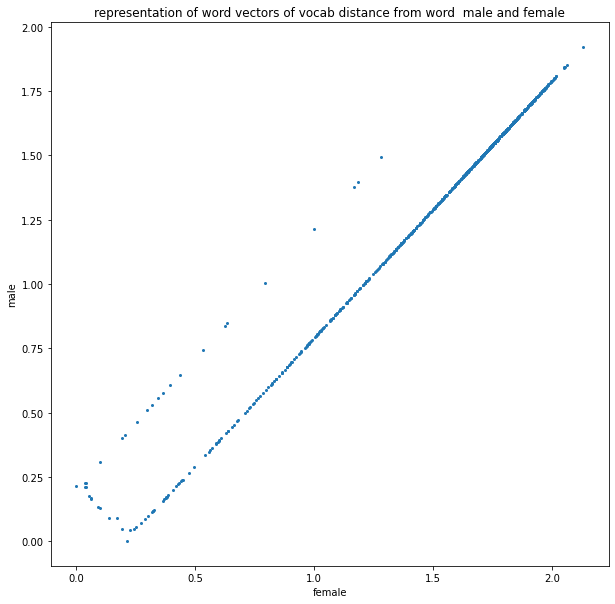

In [17]:
import matplotlib.pyplot as plt
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.ylabel('male')
plt.xlabel('female')
plt.title("representation of word vectors of vocab distance from word  male and female")
plt.plot(x,y, marker='o', linestyle='none', markersize=2)
plt.show()

In [18]:
#find similar word
similar=model.wv.most_similar(positive=['man'],topn=10)
similar

[('women', 0.9998632669448853),
 ('t', 0.9998605847358704),
 ('s', 0.9998500943183899),
 ('sexist', 0.9998487234115601),
 ('equality', 0.9998478889465332),
 ('like', 0.9998472929000854),
 ('think', 0.9998411536216736),
 ('men', 0.9998387098312378),
 ('feminists', 0.9998374581336975),
 ('m', 0.9998372793197632)]

In [19]:
#find similar word
similar=model.wv.most_similar(positive=['female'],topn=10)
similar

[('women', 0.9998911023139954),
 ('m', 0.999872088432312),
 ('sexist', 0.9998711347579956),
 ('s', 0.9998632669448853),
 ('t', 0.999862790107727),
 ('woman', 0.9998500347137451),
 ('mkr', 0.999848484992981),
 ('like', 0.9998459815979004),
 ('feminists', 0.9998452663421631),
 ('men', 0.9998371601104736)]

In [20]:
# from sklearn.manifold import TSNE

# def tsne_plot(model):
#     "Creates and TSNE model and plots it"
#     labels = []
#     tokens = []

#     for key in v__dict:
#         tokens.append(model.wv[key])
#         labels.append(key)
    
#     tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
#     new_values = tsne_model.fit_transform(tokens)

#     x = []
#     y = []
#     for value in new_values:
#         x.append(value[0])
#         y.append(value[1])
#     plt.figure(figsize=(16, 16)) 
#     for i in range(len(x)):
#         plt.scatter(x[i],y[i])
#         plt.annotate(labels[i],
#                      xy=(x[i], y[i]),
#                      xytext=(5, 2),
#                      textcoords='offset points',
#                      ha='right',
#                      va='bottom')
#     plt.show()

# tsne_plot(model)

In [21]:

vt=model.wv['population']
#get pearson coefficient
d2=np.linalg.norm(vt-v2)
d1=np.linalg.norm(vt-v1)
print(d1,d2)

1.5812708 1.791997


In [22]:
import math
x_new=[]
y_new=[]
for key in v__dict:
  v=model.wv[key]
  res=(v1-v2)
  #print(v, res)
  u=np.dot(v,res)
  d=np.linalg.norm(res)
  v_new=(u/d)*(res)
  dis1=np.linalg.norm(v_new-v1)
  dis2=np.linalg.norm(v2-v_new)
  model.wv[key]=v_new
  x_new.append(dis2)
  y_new.append(dis1)

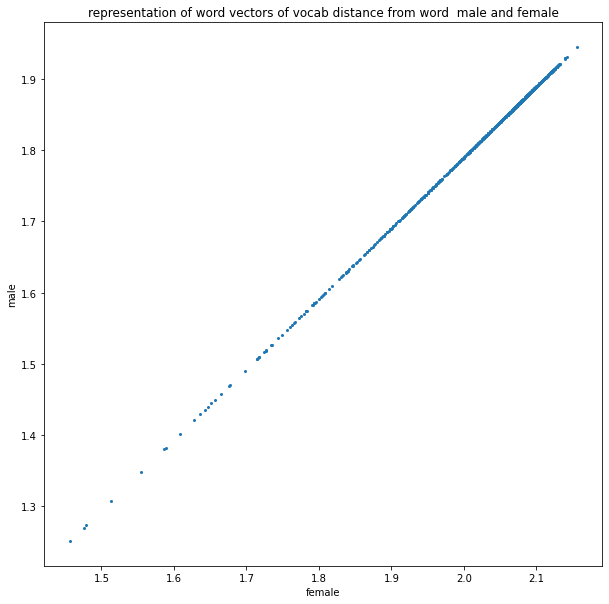

In [23]:
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.title("representation of word vectors of vocab distance from word  male and female")
plt.xlabel('female')
plt.ylabel('male')
plt.plot(x_new,y_new, marker='o', linestyle='none', markersize=2)
plt.show()

In [24]:
v__dict.get('kat')

array([ 0.05191619, -0.5406078 ,  0.44722238,  0.5381327 ,  0.37403017,
        0.4649277 ,  0.01209792, -0.17506334, -0.21903239,  0.21889053,
        0.12930271, -0.52809983,  0.17138281, -0.01536055,  0.01307903,
        0.19966915, -0.11886416, -0.0674134 ,  0.1876806 ,  0.11621428,
       -0.02141544, -0.00247802, -0.11125767, -0.41674864, -0.18402116,
        0.27883908, -0.48526475,  0.15957579, -0.31745487,  0.27599937,
        0.35046473,  0.16169678, -0.23352952, -0.4215374 , -0.00529053,
       -0.19473098, -0.21442345, -0.05268734,  0.09531397, -0.13286887,
       -0.14547732, -0.06612321,  0.28213152,  0.8300292 ,  0.30760944,
       -0.19908679,  0.3805753 , -0.1513885 ,  0.5091391 ,  0.1675495 ,
        0.182106  ,  0.36499962,  0.17742376, -0.06550214,  0.26403314,
       -0.10667708,  0.35397822,  0.38474187, -0.19133666, -0.23630078,
       -0.04644775,  0.16581108, -0.05741002,  0.29331243, -0.23059511,
       -0.02389735, -0.2541719 , -0.2210031 ,  0.11580657, -0.18

In [25]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Flatten, Embedding, Activation, Dropout
from tensorflow.keras.layers import GRU,SimpleRNN
from tensorflow.keras.optimizers import Adam, RMSprop
from keras import regularizers
from sklearn.model_selection import train_test_split

In [26]:
token = Tokenizer()
token.fit_on_texts(corpus)
#encode this text
encoded_text=token.texts_to_sequences(corpus)
#we need fixed size input
max_length = 30
X=pad_sequences(encoded_text, maxlen=max_length, padding='post')


In [27]:
vocab_size = len(token.word_index)+1
vocab_size

7431

In [28]:
y=df['Final']

In [29]:
print(X.shape, y.shape)

(2663, 30) (2663,)


In [30]:
x_train,x_test, y_train, y_test=train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [31]:
word_vector_matrix=np.zeros((vocab_size, 100))
words_vector_not_present=[]
for word, index in token.word_index.items():
  vector = v__dict.get(word)
  if vector is not None:
    word_vector_matrix[index]=vector
  else:
    words_vector_not_present.append(word)

In [32]:
vec_size=100
model1 =Sequential()
model1.add(Embedding(vocab_size, vec_size, input_length=max_length, weights=[word_vector_matrix], trainable=False))
model1.add(SimpleRNN(units=30))
model1.add(Dense(units=3, kernel_initializer='he_normal', activation='softmax'))
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 100)           743100    
                                                                 
 simple_rnn (SimpleRNN)      (None, 30)                3930      
                                                                 
 dense (Dense)               (None, 3)                 93        
                                                                 
Total params: 747,123
Trainable params: 4,023
Non-trainable params: 743,100
_________________________________________________________________


In [38]:
history=model1.fit(x_train, y_train, epochs=300, validation_data=(x_test, y_test))
loss, accuracy = model1.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model1.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy)) 

Epoch 1/300
67/67 [==============================] - 1s 10ms/step - loss: 0.3331 - accuracy: 0.8695 - val_loss: 1.1875 - val_accuracy: 0.6323
Epoch 2/300
67/67 [==============================] - 1s 10ms/step - loss: 0.3639 - accuracy: 0.8545 - val_loss: 1.1491 - val_accuracy: 0.6360
Epoch 3/300
67/67 [==============================] - 1s 9ms/step - loss: 0.3443 - accuracy: 0.8610 - val_loss: 1.1520 - val_accuracy: 0.6285
Epoch 4/300
67/67 [==============================] - 1s 8ms/step - loss: 0.3108 - accuracy: 0.8765 - val_loss: 1.1958 - val_accuracy: 0.6435
Epoch 5/300
67/67 [==============================] - 1s 9ms/step - loss: 0.3176 - accuracy: 0.8779 - val_loss: 1.1865 - val_accuracy: 0.6341
Epoch 6/300
67/67 [==============================] - 1s 8ms/step - loss: 0.2897 - accuracy: 0.8897 - val_loss: 1.1866 - val_accuracy: 0.6398
Epoch 7/300
67/67 [==============================] - 1s 9ms/step - loss: 0.3123 - accuracy: 0.8817 - val_loss: 1.2033 - val_accuracy: 0.6398
Epoch 8/300

KeyboardInterrupt: ignored

In [34]:
# predict probabilities for test set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_probs = model1.predict(x_test, verbose=0)
y_pred=np.argmax( y_probs,axis=1)
print(classification_report(y_test,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        17
         1.0       0.68      0.73      0.70       308
         2.0       0.54      0.52      0.53       208

    accuracy                           0.62       533
   macro avg       0.41      0.42      0.41       533
weighted avg       0.60      0.62      0.61       533

Confusion Matrix:
[[  0   8   9]
 [  1 225  82]
 [  2  98 108]]


In [35]:
model2 =Sequential()
model2.add(Embedding(vocab_size, vec_size, input_length=max_length, weights=[word_vector_matrix], trainable=False))
model2.add(GRU(units=3))
model2.add(Dense(units=3, kernel_initializer='he_normal', activation='softmax'))
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 100)           743100    
                                                                 
 gru (GRU)                   (None, 3)                 945       
                                                                 
 dense_1 (Dense)             (None, 3)                 12        
                                                                 
Total params: 744,057
Trainable params: 957
Non-trainable params: 743,100
_________________________________________________________________


In [39]:
history=model2.fit(x_train, y_train, epochs=300, validation_data=(x_test, y_test))
loss, accuracy = model2.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy)) 

Epoch 1/300
67/67 [==============================] - 3s 39ms/step - loss: 0.6205 - accuracy: 0.7141 - val_loss: 0.6382 - val_accuracy: 0.7336
Epoch 2/300
67/67 [==============================] - 2s 34ms/step - loss: 0.6202 - accuracy: 0.7075 - val_loss: 0.6350 - val_accuracy: 0.7467
Epoch 3/300
67/67 [==============================] - 2s 35ms/step - loss: 0.6253 - accuracy: 0.7188 - val_loss: 0.6408 - val_accuracy: 0.7392
Epoch 4/300
67/67 [==============================] - 2s 33ms/step - loss: 0.6191 - accuracy: 0.7197 - val_loss: 0.6367 - val_accuracy: 0.7411
Epoch 5/300
67/67 [==============================] - 2s 30ms/step - loss: 0.6177 - accuracy: 0.7164 - val_loss: 0.6802 - val_accuracy: 0.6792
Epoch 6/300
67/67 [==============================] - 2s 35ms/step - loss: 0.6262 - accuracy: 0.7056 - val_loss: 0.6405 - val_accuracy: 0.7392
Epoch 7/300
67/67 [==============================] - 2s 35ms/step - loss: 0.6199 - accuracy: 0.7103 - val_loss: 0.6487 - val_accuracy: 0.7092
Epoch 

In [40]:
y_probs = model2.predict(x_test, verbose=0)
y_pred=np.argmax( y_probs,axis=1)
print(classification_report(y_test,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        17
         1.0       0.78      0.82      0.80       308
         2.0       0.69      0.70      0.69       208

    accuracy                           0.74       533
   macro avg       0.49      0.51      0.50       533
weighted avg       0.72      0.74      0.73       533

Confusion Matrix:
[[  0   8   9]
 [  0 252  56]
 [  0  63 145]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
from sklearn.ensemble import GradientBoostingClassifier

#gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.25, max_features=2, max_depth=2, random_state=0)
gb_clf = GradientBoostingClassifier()
model1=gb_clf.fit(x_train, y_train)

print("Score for training data : {0:.3f}".format(model1.score(x_train, y_train)))
print("Score for testing data : {0:.3f}".format(model1.score(x_test, y_test)))

y_pred=model1.predict(x_test)
y_pred_train=model1.predict(x_train)

#calculate accuracy
print("Accuracy Score of gradient boosting Model on test data : ",accuracy_score(y_test, y_pred))
print("Accuracy Score of gradient boosting Model on training data : ",accuracy_score(y_train, y_pred_train))
print(classification_report(y_test,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Score for training data : 0.853
Score for testing data : 0.782
Accuracy Score of gradient boosting Model on test data :  0.7823639774859287
Accuracy Score of gradient boosting Model on training data :  0.8530516431924883
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        17
         1.0       0.80      0.89      0.84       308
         2.0       0.77      0.69      0.73       208

    accuracy                           0.78       533
   macro avg       0.52      0.53      0.52       533
weighted avg       0.76      0.78      0.77       533

Confusion Matrix:
[[  0   8   9]
 [  0 273  35]
 [  3  61 144]]


In [42]:
model3 =Sequential()
model3.add(Embedding(vocab_size, vec_size, input_length=max_length, weights=[word_vector_matrix], trainable=False))
model3.add(Conv1D(32, 1))
model3.add(MaxPooling1D(2))
model3.add(Dropout(0.4))
model3.add(Flatten())
model3.add(Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(l=0.01)))
model3.add(Dropout(0.5))
model3.add(Dense(16, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(l=0.01)))
model3.add(Dropout(0.3))
model3.add(Dense(32,kernel_initializer='he_normal', activation='softmax'))
model3.add(Dense(3,kernel_initializer='he_normal', activation='softmax'))

model3.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 30, 100)           743100    
                                                                 
 conv1d (Conv1D)             (None, 30, 32)            3232      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 15, 32)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 32)            0         
                                                                 
 flatten (Flatten)           (None, 480)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                15392     
                                                      

In [43]:
history=model3.fit(x_train, y_train, epochs=300, validation_data=(x_test, y_test))

Epoch 1/300
67/67 [==============================] - 3s 16ms/step - loss: 1.0088 - accuracy: 0.5859 - val_loss: 0.8180 - val_accuracy: 0.6248
Epoch 2/300
67/67 [==============================] - 1s 9ms/step - loss: 0.8013 - accuracy: 0.6376 - val_loss: 0.8230 - val_accuracy: 0.6417
Epoch 3/300
67/67 [==============================] - 1s 12ms/step - loss: 0.8029 - accuracy: 0.6460 - val_loss: 0.8137 - val_accuracy: 0.6341
Epoch 4/300
67/67 [==============================] - 1s 9ms/step - loss: 0.7953 - accuracy: 0.6498 - val_loss: 0.8004 - val_accuracy: 0.6604
Epoch 5/300
67/67 [==============================] - 1s 8ms/step - loss: 0.8050 - accuracy: 0.6437 - val_loss: 0.7773 - val_accuracy: 0.6698
Epoch 6/300
67/67 [==============================] - 1s 9ms/step - loss: 0.8117 - accuracy: 0.6455 - val_loss: 0.8033 - val_accuracy: 0.6567
Epoch 7/300
67/67 [==============================] - 1s 10ms/step - loss: 0.7962 - accuracy: 0.6507 - val_loss: 0.7877 - val_accuracy: 0.6679
Epoch 8/30

In [44]:
y_probs = model3.predict(x_test, verbose=0)
y_pred=np.argmax( y_probs,axis=1)
print(classification_report(y_test,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        17
         1.0       0.58      1.00      0.73       308
         2.0       0.00      0.00      0.00       208

    accuracy                           0.58       533
   macro avg       0.19      0.33      0.24       533
weighted avg       0.33      0.58      0.42       533

Confusion Matrix:
[[  0  17   0]
 [  0 308   0]
 [  0 208   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
